In [5]:
import matplotlib.pyplot as plt
import pytorch_lightning as pl

import torch.nn.functional as F

In [6]:
%load_ext autoreload
%autoreload 2
from data_tools import MnistAutoencoderDataset
from torch.utils.data import DataLoader

from model_package.autoencoders import ConvAutoEncoder
from CONFIG import CONFIG

In [37]:
import seaborn as sns 
sns.set()

from utils import plot_before_after, plot_hidden_distr
import warnings 
warnings.filterwarnings(action='ignore', category=pl.utilities.warnings.PossibleUserWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)

In [48]:
train_dataset = MnistAutoencoderDataset(type_='conv_crop',
                                        root=CONFIG['MNIST_DIR'], 
                                        train=True, 
                                        transform=CONFIG['TRANSFORMS'],
                                        download=True)

test_dataset = MnistAutoencoderDataset(type_='conv_crop',
                                       root=CONFIG['MNIST_DIR'], 
                                       train=False, 
                                       transform=CONFIG['TRANSFORMS'],
                                       download=True,
                                       )

train_loader = DataLoader(train_dataset, 
                          batch_size=CONFIG['TRAIN_BATCH_SIZE'], 
                          shuffle=True, 
                          drop_last=False)
test_loader = DataLoader(test_dataset, 
                         batch_size=CONFIG['TEST_BATCH_SIZE'],
                         shuffle=True, 
                         drop_last=False)

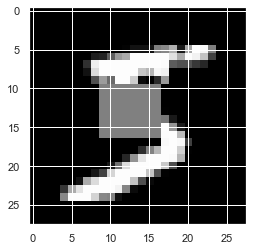

In [57]:
plt.imshow(train_dataset[0][0].permute(1,2,0), cmap='gray');

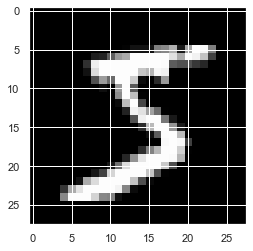

In [58]:
plt.imshow(train_dataset[0][1].permute(1,2,0), cmap='gray');

In [61]:
MAX_EPOCHS = 20
autoencoder = ConvAutoEncoder(1, loss=F.mse_loss, 
                              lr=0.001, context_size=32)
trainer = pl.Trainer(max_epochs=MAX_EPOCHS, 
                     accelerator=CONFIG['ACCELERATOR'])
trainer.fit(autoencoder, train_dataloaders=train_loader,
            val_dataloaders=test_loader)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 47.0 K
1 | decoder | Sequential | 47.3 K
---------------------------------------
94.3 K    Trainable params
0         Non-trainable params
94.3 K    Total params
0.377     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

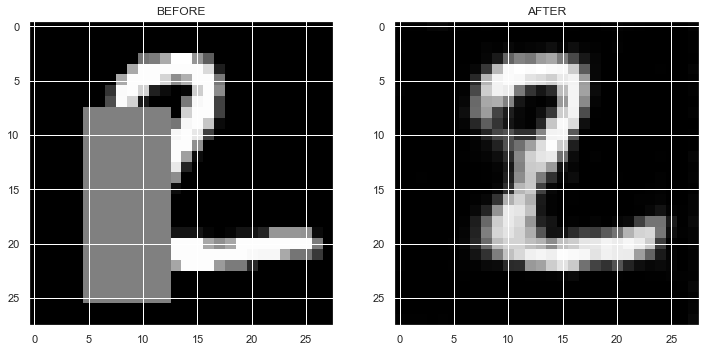

In [69]:
plot_before_after(autoencoder.cpu(), test_dataset[1][0].unsqueeze(0), is_flatten=False)

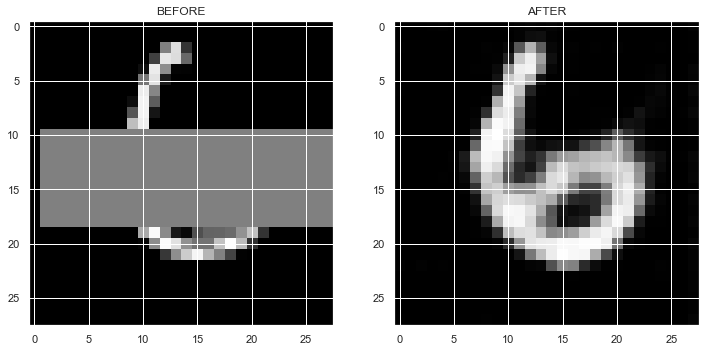

In [71]:
plot_before_after(autoencoder.cpu(), test_dataset[100][0].unsqueeze(0), is_flatten=False)

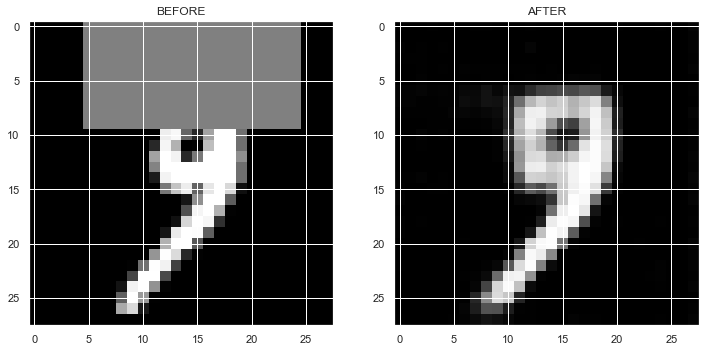

In [72]:
plot_before_after(autoencoder.cpu(), test_dataset[1000][0].unsqueeze(0), is_flatten=False)

In [73]:
trainer.validate(autoencoder, test_loader)

You are using a CUDA device ('NVIDIA GeForce RTX 3060 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         VAL_LOSS          │    0.06652016192674637    │
└───────────────────────────┴───────────────────────────┘

[{'VAL_LOSS': 0.06652016192674637}]